Here I use the XRD output of Ryan's VASP calculations to model the Bragg peak ratio as a function of incident flux in the 0-5 eV range

In [44]:
%matplotlib notebook
import numpy as np
from scipy.interpolate import interp1d as interp
import matplotlib.pyplot as plt
import MgOdos
import pandas as pd

In [51]:
T, i200, i111 = np.genfromtxt('VASP_Bragg_peaks.dat').T

In [30]:
avogadro = 6.022 * 10**23
to_ev = 6.24e18
peratom = lambda I, mu, M, rho: I * M / (mu * rho * avogadro)
to_ev * 2.4e-17

def flux_to_ev(flux):
    return peratom(flux, .015, 40.3, 3.6) * to_ev

def ev_to_flux(ev):
    return ev / (peratom(1., .015, 40.3, 3.6) * to_ev)

In [66]:
list(map(flux_to_ev, np.array([ 19933.65 ,  13085.55 ,   8590.5  ,   5639.4  ,   3702.06 ,
         2430.315,   1595.43 ,   1047.33 ,    687.555,    451.35 ])))

[154.14944071736966,
 101.19221587512455,
 66.431424775821981,
 43.610194619727665,
 28.628498970441711,
 18.793933776154102,
 12.3376623048821,
 8.0991355695782126,
 5.3169499169711054,
 3.4903467286615744]

In [35]:
tgrid = np.arange(0, 5, 0.1)

In [40]:
ugrid = MgOdos.U_of_T(tgrid)

<IPython.core.display.Javascript object>


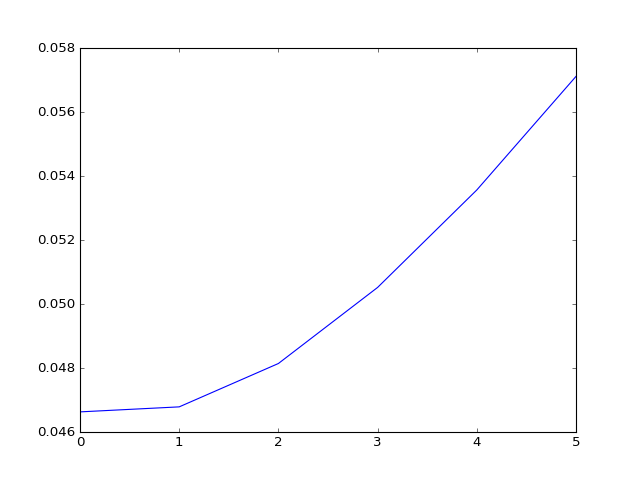

In [58]:
plt.plot(i111/i200)

In [59]:
vasp_u_to_i111 = interp(MgOdos.U_of_T(T), (i200[0]/i111[0]) * i111/i200)

<IPython.core.display.Javascript object>


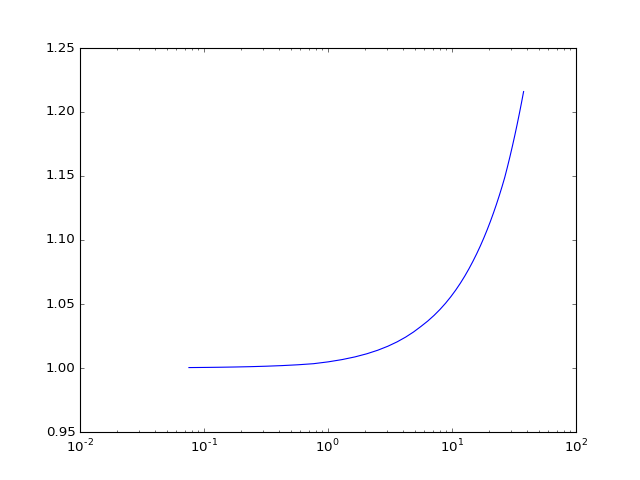

In [61]:
plt.semilogx()
plt.plot(ugrid, vasp_u_to_i111(ugrid))

<IPython.core.display.Javascript object>


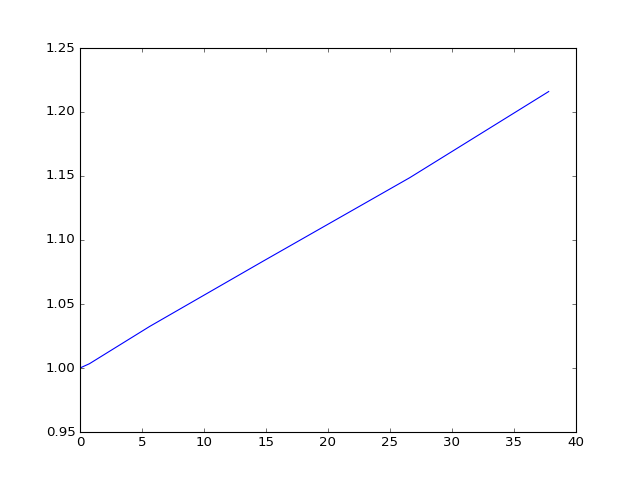

In [64]:
plt.plot(ugrid, vasp_u_to_i111(ugrid))

In [62]:
np.savetxt('vasp_progression.dat', [ugrid, vasp_u_to_i111(ugrid)])